# Histogramas de Imagenes con OpenCV ( cv2.calcHist )
# HISTOGRAMA Y EUALIZACIÓN<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**


## Bienvenidos a Jupyter Notebooks!

### Import Packages

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

### Función para mostrar imágenes in Jupyter Notebooks y Google Colab

In [2]:
def plt_imshow(title, image):
    # convierte las imagenes BGR a al espacio de colores RGB y las visualiza
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Creando Histogramas en Escala de Grises con OpenCV

In [3]:
def plot_histogram(image, title, mask=None):
	# ubica las imagenes en su respectivo canal, entones inicialliza los grupos de canales
	# con la figura para visualizarlos
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# loop sobre los canales de la imagen
	for (chan, color) in zip(chans, colors):
		# crea un histograma para el canal actual y lo visualiza
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

	plt.show()

In [4]:
# # construye los argumentos
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# Si usamos Jupyter Notebooks podemos reemplazar nuestro argumento
# con el argumeto *hard coded* arguments y sus valores
args = {
    "image": "beach.png"
}

In [5]:
# Carga la imagen de entrada y la convierte a escala de grises
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# Calcula un histograma en escala de grises
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

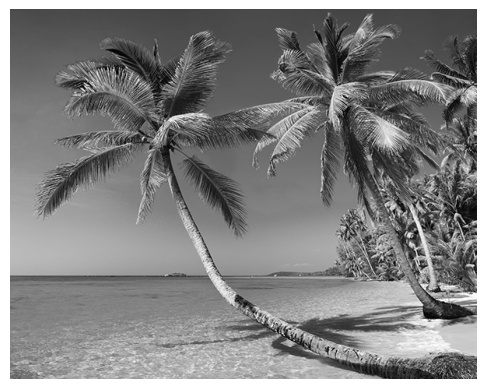

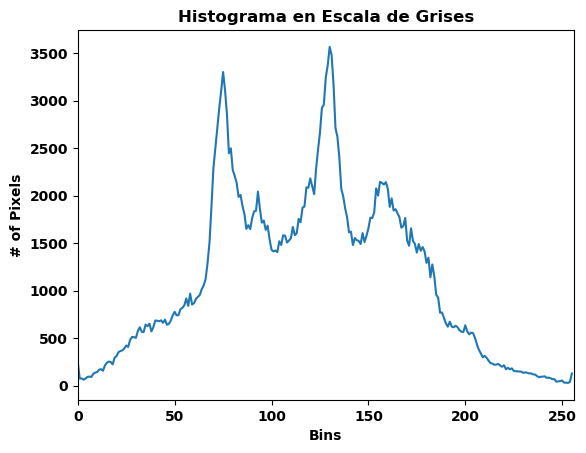

In [7]:
# Pasamos la imagen a matplotlib que espera una imagen RGB asi convertida y la visualiza
# con matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# Visualiza el histograma
plt.figure()
plt.title("Histograma en Escala de Grises")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

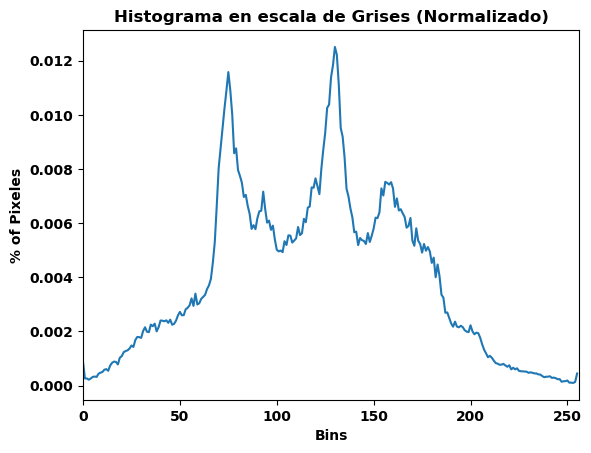

In [8]:
# normaliza el histograma
hist /= hist.sum()

# visualiza el histograma normaizado
plt.figure()
plt.title("Histograma en escala de Grises (Normalizado)")
plt.xlabel("Bins")
plt.ylabel("% of Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### Creando Histogramas a color con OpenCV

In [9]:
# carga la imagen de entrada desde el disco
image = cv2.imread(args["image"])

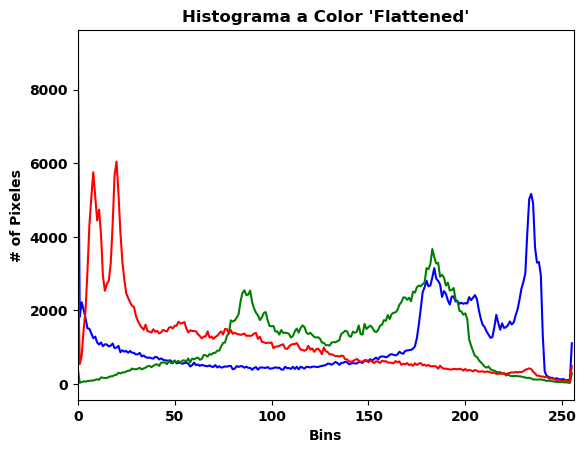

In [10]:
# ubica las imagenes en su respectivo canal, entones inicialliza los grupos de canales
# con la figura para visualizarlos
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma a Color 'Flattened'")
plt.xlabel("Bins")
plt.ylabel("# of Pixeles")

# loop sobre los canales de la imagen
for (chan, color) in zip(chans, colors):
	# crea un histograma para los canales actuales y los visualiza
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

Forma del Histograma 2D: (32, 32), with 1024 valores


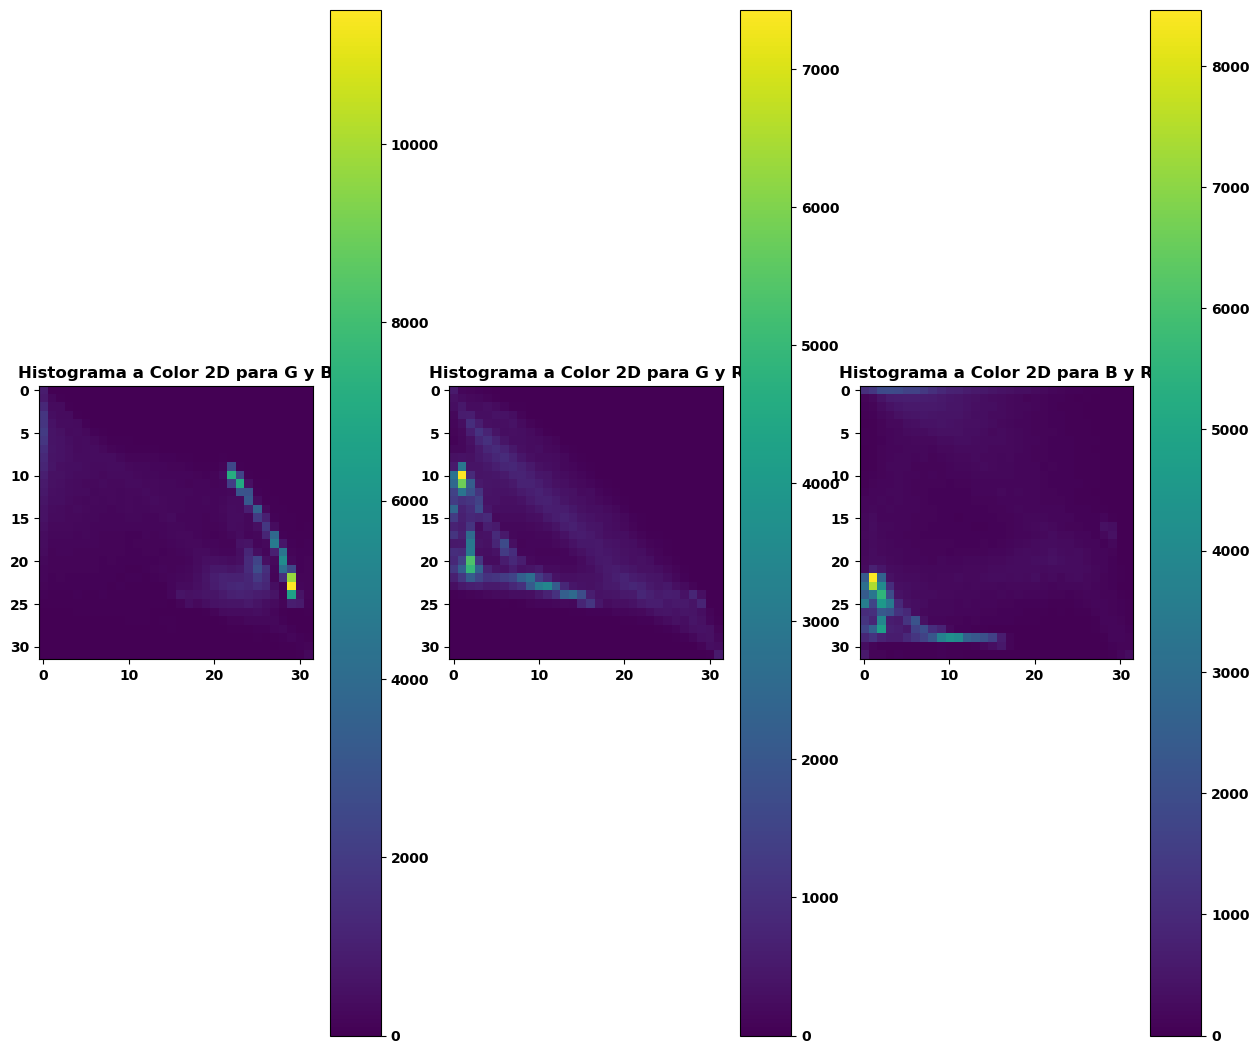

In [11]:
# crea una nueva visualizacion y gráfica un histograma con 20 colores para el
# los canales verdegreen y azul
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma a Color 2D para G y B")
plt.colorbar(p)

# visualiza en 2D un histograma a color para los canales verde y rojo
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma a Color 2D para G y R")
plt.colorbar(p)

# visualiza en 2D un histograma a color para los canales azul y rojo
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma a Color 2D para B y R")
plt.colorbar(p)

# finalmente nos deja examinar las dimensiones de uno de los histograas 2d
print("Forma del Histograma 2D: {}, with {} valores".format(
	hist.shape, hist.flatten().shape[0]))

In [12]:
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("Forma del Histograma 3D: {}, with {} valores".format(
	hist.shape, hist.flatten().shape[0]))

Forma del Histograma 3D: (8, 8, 8), with 512 valores


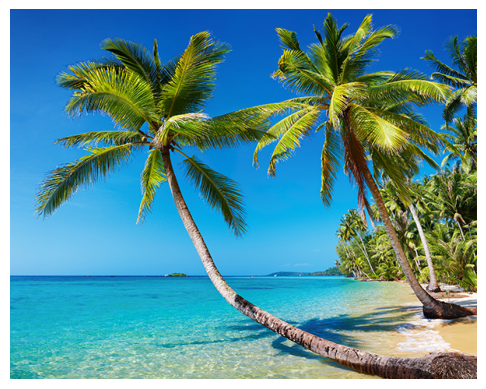

In [12]:
# Visualiza la imagen de entrada original
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# muestra niestra visualizacion
plt.show()

### Calculando Histograma de una Imagen para regiones con mascara con OpenCV

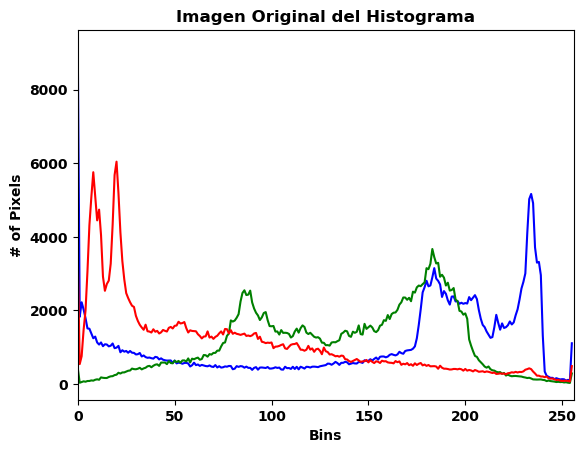

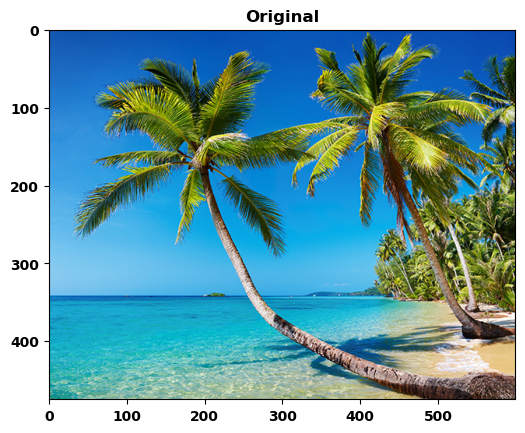

In [12]:
# carga la imagen de la playa y grafica un histograma
image = cv2.imread("beach.png")
plot_histogram(image, "Imagen Original del Histograma")
plt_imshow("Original", image)

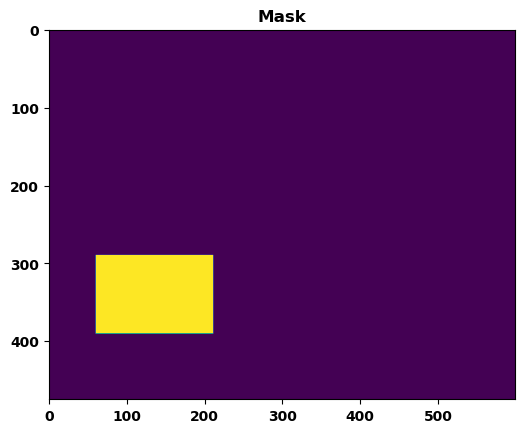

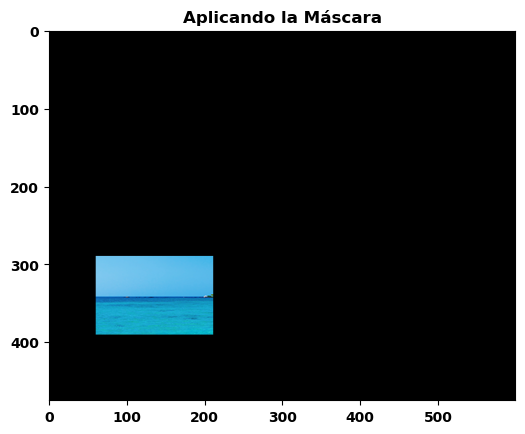

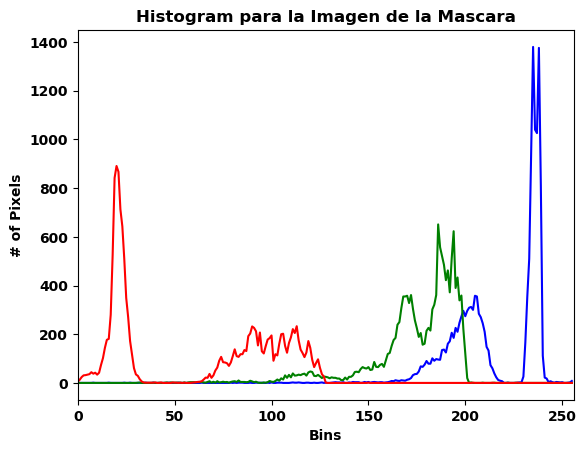

In [13]:
# construye una mascara para nuestra imagen; nuestra mascara será *black* para las regiones
# que deseamos ignorar y *white* pra las regiones que deseamos examinar
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)

# muestra la mascara en la region
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Aplicando la Máscara", masked)

# calcula un histograma para nuestra imagen, pero unicamente incluye pixels en
# la region de la mascara
plot_histogram(image, "Histogram para la Imagen de la Mascara", mask=mask)

# show our plots
plt.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).